<a href="https://colab.research.google.com/github/Vishwas-K-S/Detection-of-RA-Using-CNN/blob/main/TrainingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# !pip install unrar
#!unrar x "/content/Source images.rar" #//unrar images folder

In [34]:
# import required libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [35]:
# accessing image folder for training and testing
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Source images",
    shuffle = True, 
    image_size = (256, 256), 
    batch_size = 8
)

Found 87 files belonging to 2 classes.


In [36]:
class_names = dataset.class_names

In [37]:
class_names

['negative', 'positive']

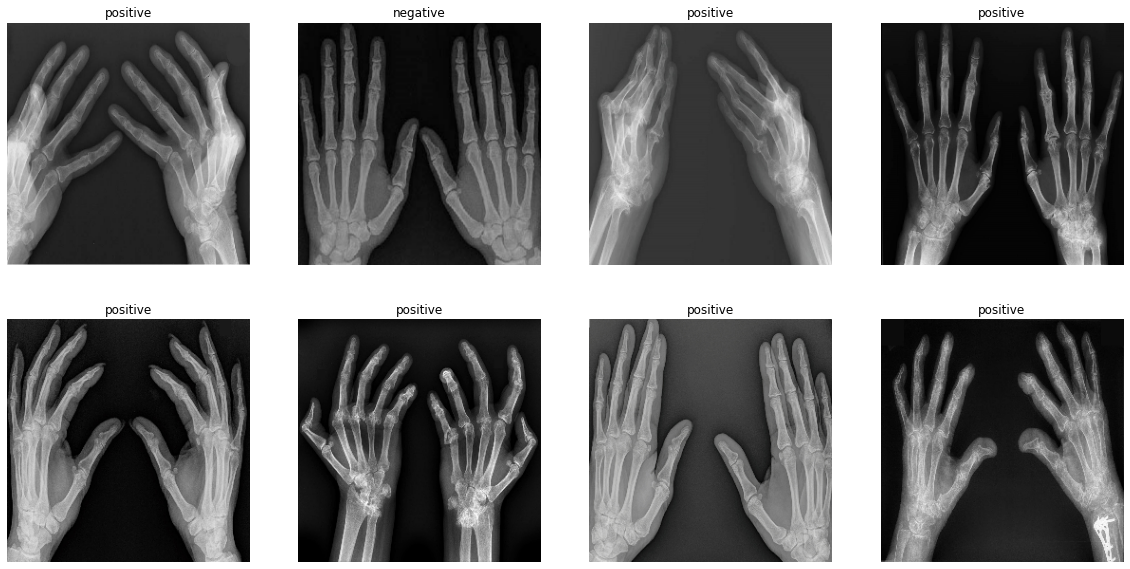

In [38]:
# vizualizing the random images
plt.figure(figsize=(20,10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(2,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")

In [39]:
# function to split dataset into training set, testing set and validation set
def split_dataset(ds, train_split = 0.8, test_split = 0.1, val_split = 0.1, Shuffle = True, shuffle_size = 1000):
    ds_len = len(ds)
    if Shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
    
    train_size = int(ds_len*train_split)
    val_size = int(ds_len*val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, test_ds, val_ds

In [40]:
# calling the split_dataset function to split the dataset
train_ds, test_ds, val_ds = split_dataset(dataset)

In [41]:
#creating resizeing and rescaleing layer
resize_rescale = tf.keras.Sequential([
                                      layers.Resizing(256, 256),
                                      layers.Rescaling(1.0/255)

])

In [42]:
# creating data augmentation layer
data_augmentation = tf.keras.Sequential([
                                         layers.RandomFlip("horizontal_and_vertical"),
                                         layers.RandomRotation(0.2)
])

In [51]:
# creating the CNN model
input_shape = (8, 256,256, 3)

model = models.Sequential([
                           resize_rescale,
                           data_augmentation,
                           layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
                           layers.MaxPool2D(),
                           layers.Conv2D(64, (3,3), activation='relu'),
                           layers.MaxPool2D(),
                        #    layers.Conv2D(64, (3,3), activation='relu'),
                        #    layers.MaxPool2D(),
                           layers.Conv2D(64, (3,3), activation='relu'),
                           layers.MaxPool2D(),
                           layers.Conv2D(64, (3,3), activation='relu'),
                           layers.MaxPool2D(),
                           layers.Flatten(),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(2, activation='softmax'),
])
model.build(input_shape=input_shape)

In [52]:
# model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (8, 254, 254, 32)         896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (8, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (8, 125, 125, 64)         18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (8, 62, 62, 64)          0         
 g2D)                                                 

In [53]:
# compiling model
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [54]:
# fitting the model
history = model.fit(
    train_ds,
    epochs=25,
    batch_size = 8,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/25
8/8 [==============================] - 2s 117ms/step - loss: 0.8253 - accuracy: 0.4921 - val_loss: 0.6879 - val_accuracy: 0.4286
Epoch 2/25
8/8 [==============================] - 1s 102ms/step - loss: 0.6771 - accuracy: 0.5714 - val_loss: 0.6557 - val_accuracy: 0.5000
Epoch 3/25
8/8 [==============================] - 1s 102ms/step - loss: 0.6465 - accuracy: 0.5312 - val_loss: 0.5695 - val_accuracy: 0.5714
Epoch 4/25
8/8 [==============================] - 1s 99ms/step - loss: 0.6957 - accuracy: 0.6032 - val_loss: 0.6290 - val_accuracy: 0.8750
Epoch 5/25
8/8 [==============================] - 1s 96ms/step - loss: 0.6173 - accuracy: 0.6508 - val_loss: 0.5749 - val_accuracy: 0.6250
Epoch 6/25
8/8 [==============================] - 1s 98ms/step - loss: 0.5999 - accuracy: 0.6349 - val_loss: 0.3660 - val_accuracy: 1.0000
Epoch 7/25
8/8 [==============================] - 1s 94ms/step - loss: 0.5208 - accuracy: 0.7969 - val_loss: 0.3071 - val_accuracy: 0.7500
Epoch 8/25
8/8 [========

In [55]:
# Testing the created model aganist the test dataset
model.evaluate(test_ds)

2/2 [==============================] - 1s 13ms/step - loss: 0.2283 - accuracy: 0.9375


[0.2282540649175644, 0.9375]

In [56]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

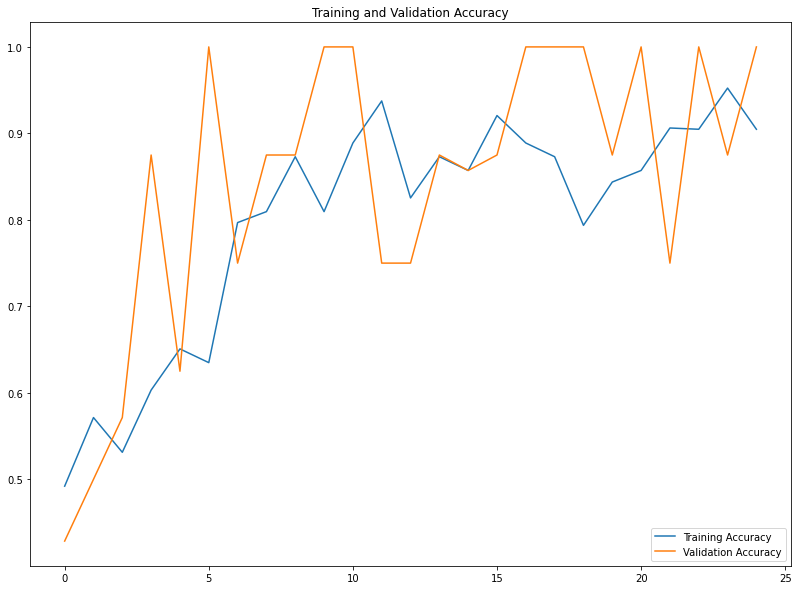

In [57]:
# plotting the training accuracy and validation accuracy
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(range(25), accuracy, label='Training Accuracy')
plt.plot(range(25), val_accuracy, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')